# Advanced Skin Diseases Diagnosis Leveraging Image Processing





### 1. Importing Necessary Libraries

In [2]:
import os
import numpy as np
from skimage.io import imread
from skimage.transform import resize
from skimage.feature import hog
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import GridSearchCV

In [3]:
# Path to the dataset folder
dataset_dir = 'C:/Users/Abhijeet/Downloads/NewSkinD'

### 2. Preprocessing and Feature Extracting

In [4]:
# Image size and HOG parameters
image_height, image_width = 248, 248
hog_params = {'pixels_per_cell': (16, 16), 'cells_per_block': (2, 2), 'visualize': False}

In [5]:
# lists to store image data and labels
data = []
labels = []

# Load images and labels from the dataset directory
for disease_folder in os.listdir(dataset_dir):
    folder_path = os.path.join(dataset_dir, disease_folder)
    if os.path.isdir(folder_path):
        for image_file in os.listdir(folder_path):
            image_path = os.path.join(folder_path, image_file)
            try:
                # Read and preprocess the image
                image = imread(image_path, as_gray=True)
                image_resized = resize(image, (image_height, image_width), anti_aliasing=True)
                
                # Extract HOG features
                features = hog(image_resized, **hog_params)
                
                # Append features and label
                data.append(features)
                labels.append(disease_folder)
            except Exception as e:
                print(f"Error processing {image_path}: {e}")

# Convert to numpy arrays
data = np.array(data)
labels = np.array(labels)

### 3. Training the SVM model

In [6]:
# Encode labels
label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels)

In [7]:
# Standardize features
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

In [8]:
# Train an SVM classifier
svm = SVC(kernel='linear', C=1, random_state=42)
svm.fit(data_scaled, labels_encoded)

SVC(C=1, kernel='linear', random_state=42)

### 4. Evaluating the Model

In [9]:
# Evaluate the model
predictions = svm.predict(data_scaled)
print("Classification Report:")
print(classification_report(labels_encoded, predictions, target_names=label_encoder.classes_))
print(f"Accuracy: {accuracy_score(labels_encoded, predictions) * 100:.2f}%")


Classification Report:
                            precision    recall  f1-score   support

        Acitinic Keratosis       1.00      1.00      1.00       100
      Basal Cell Carcinoma       1.00      1.00      1.00       100
            Dermatofibroma       1.00      1.00      1.00       100
                  Melanoma       1.00      1.00      1.00       100
                     Nevus       1.00      1.00      1.00       100
Pigmented Benign Keratosis       1.00      1.00      1.00       100
      Seborrheic Keratosis       1.00      1.00      1.00       100
   Squamous Cell Carcinoma       1.00      1.00      1.00       100
           Vascular Lesion       1.00      1.00      1.00       100

                  accuracy                           1.00       900
                 macro avg       1.00      1.00      1.00       900
              weighted avg       1.00      1.00      1.00       900

Accuracy: 100.00%


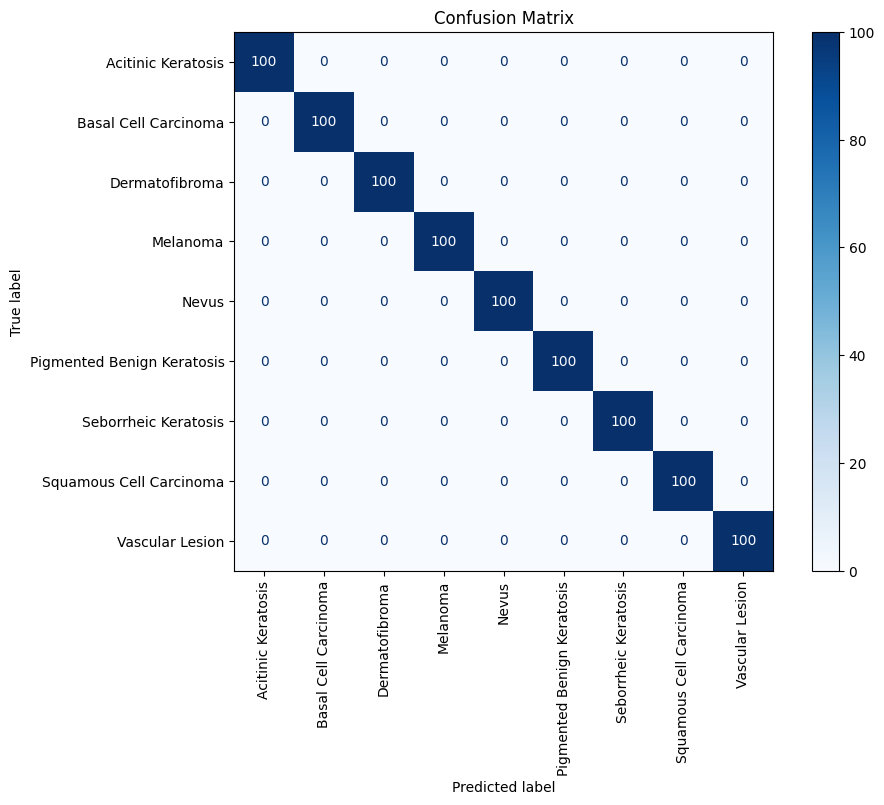

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def plot_confusion_matrix(y_true, y_pred, label_encoder):
    cm = confusion_matrix(y_true, y_pred)
    cm_display = ConfusionMatrixDisplay(cm, display_labels=label_encoder.classes_)
    
    fig, ax = plt.subplots(figsize=(10,7)) 
    cm_display.plot(cmap='Blues', ax=ax, values_format='d')  
   
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
    ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
    
    plt.title("Confusion Matrix")
    plt.show()


predictions = svm.predict(data_scaled)
plot_confusion_matrix(labels_encoded, predictions, label_encoder)


### 5. Saving the Model

In [10]:
import joblib
joblib.dump(svm, "skin_disease_model.pkl")

['skin_disease_model.pkl']

In [ ]:
from skimage.feature import hog
from skimage.transform import resize
from skimage.io import imread

def preprocess_and_predict(image_path, model, scaler, label_encoder):

    """Preprocess the image and make predictions."""
    
    # Load and preprocess the image
    image = imread(image_path, as_gray=True)  # Ensure grayscale conversion
    image_resized = resize(image, (248, 248), anti_aliasing=True)  # Match training dimensions

    # Extract HOG features using training parameters
    features = hog(image_resized, pixels_per_cell=(16, 16), cells_per_block=(2, 2), visualize=False)

    # Scale features
    features_scaled = scaler.transform([features])

    # Predict the class
    prediction_encoded = model.predict(features_scaled)
    prediction_label = label_encoder.inverse_transform(prediction_encoded)

    return prediction_label[0], image_resized


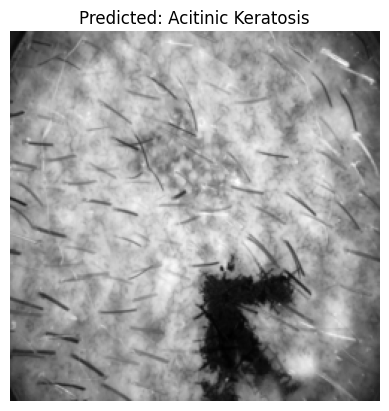

In [15]:
# Test with an image
test_image_path = "C:/Users/Abhijeet/Downloads/NewSkinD/Acitinic Keratosis/ISIC_8827801.jpg"
predicted_label, processed_image = preprocess_and_predict(test_image_path, svm, scaler, label_encoder)

# Display the test image and predicted label
import matplotlib.pyplot as plt
plt.imshow(processed_image, cmap='gray')
plt.title(f"Predicted: {predicted_label}")
plt.axis('off')
plt.show()


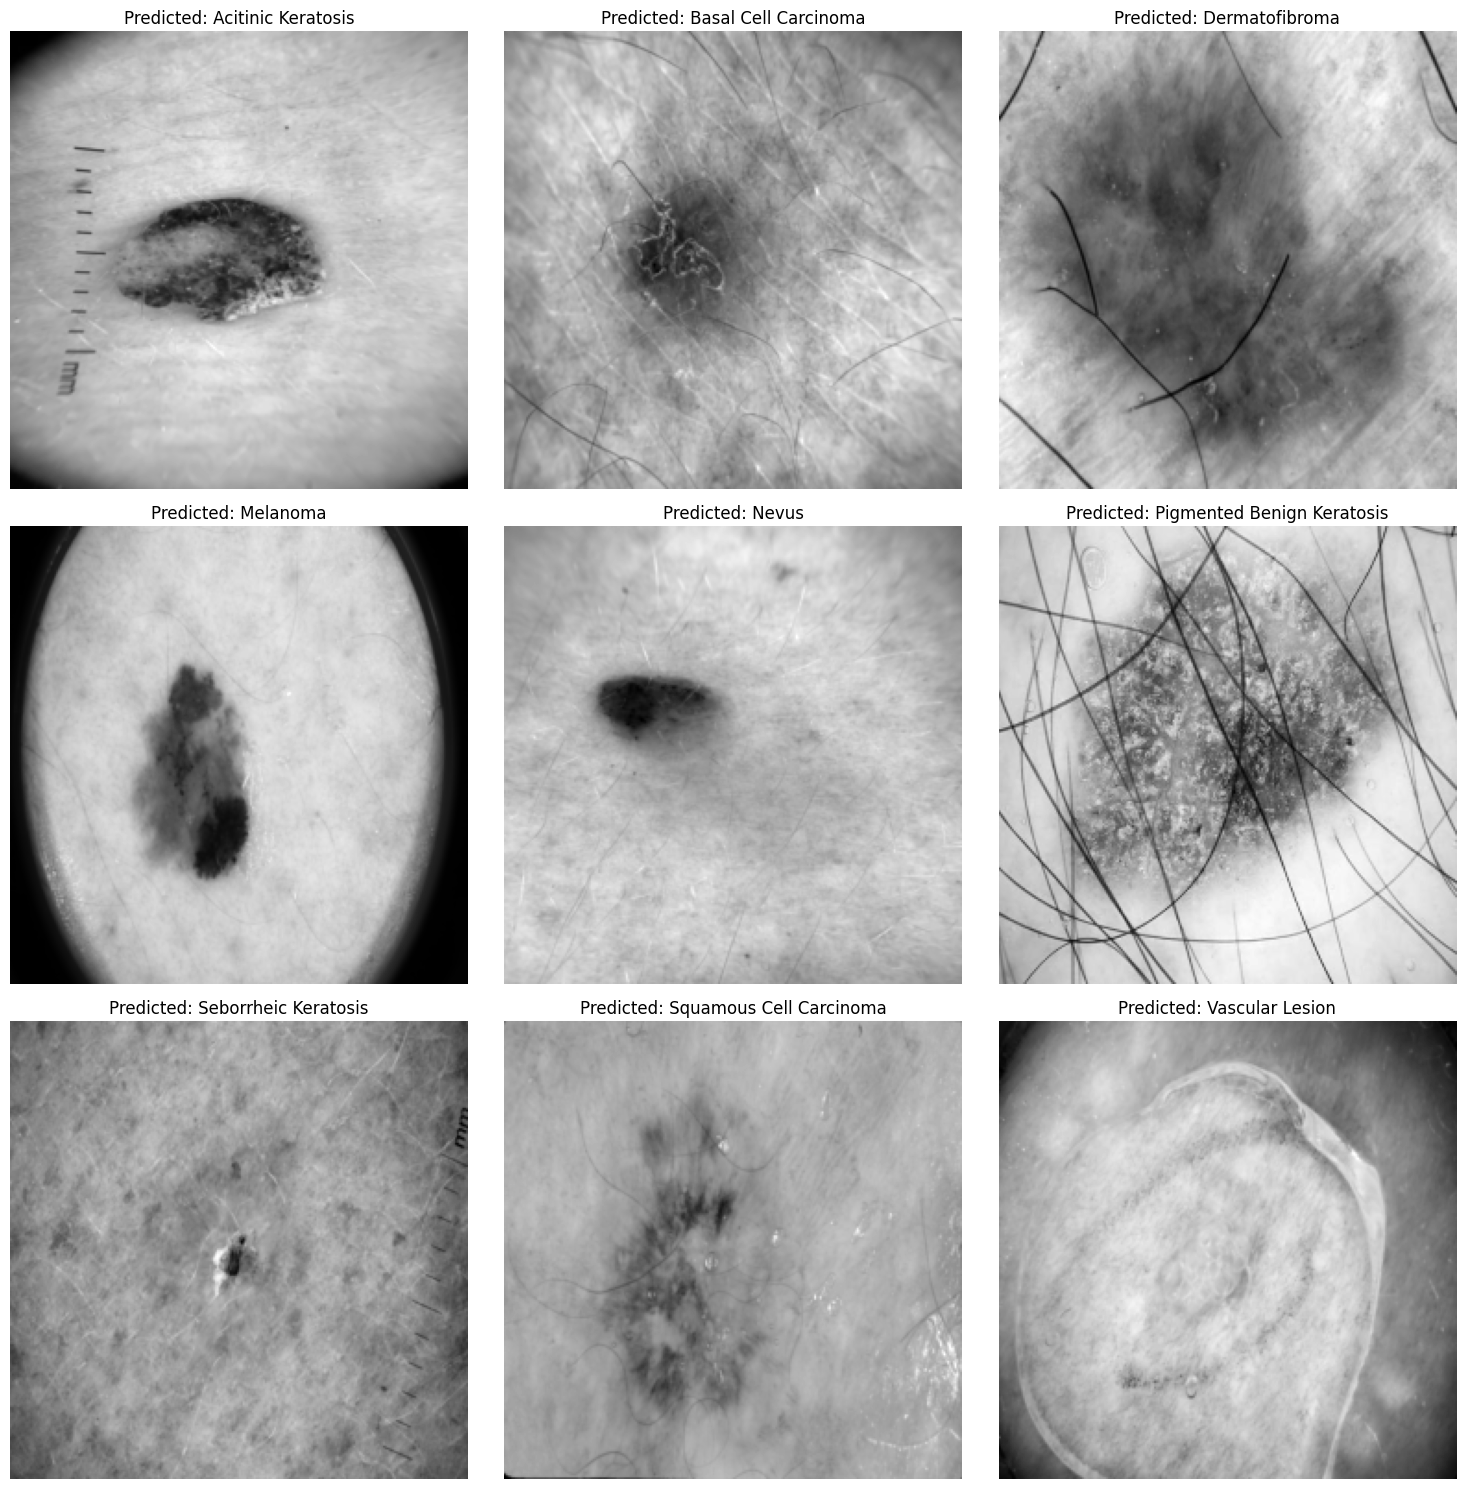

In [22]:
import matplotlib.pyplot as plt
import os

def display_image_batch(image_paths, model, scaler, label_encoder):
    fig, axes = plt.subplots(3, 3, figsize=(15, 15))  # 3x3 grid for displaying 9 images
    axes = axes.ravel()

    for i, image_path in enumerate(image_paths[:9]):  # Display up to 9 images
        predicted_label, processed_image = preprocess_and_predict(image_path, model, scaler, label_encoder)
        axes[i].imshow(processed_image, cmap='gray')
        axes[i].set_title(f"Predicted: {predicted_label}", fontsize=12)
        axes[i].axis('off')

    plt.tight_layout()
    plt.show()

# Example usage with a batch of images
image_batch = [
    "C:/Users/Abhijeet/Downloads/NewSkinD/Acitinic Keratosis/ISIC_0928255.jpg", 
    "C:/Users/Abhijeet/Downloads/NewSkinD/Basal Cell Carcinoma/ISIC_9930788.JPG",
    "C:/Users/Abhijeet/Downloads/NewSkinD/Dermatofibroma/ISIC_0014767.jpg",
    "C:/Users/Abhijeet/Downloads/NewSkinD/Melanoma/ISIC_4425322.JPG",
    "C:/Users/Abhijeet/Downloads/NewSkinD/Nevus/ISIC_2657883.jpg",
    "C:/Users/Abhijeet/Downloads/NewSkinD/Pigmented Benign Keratosis/ISIC_0029051.jpg",
    "C:/Users/Abhijeet/Downloads/NewSkinD/Seborrheic Keratosis/ISIC_0562430.jpg",
    "C:/Users/Abhijeet/Downloads/NewSkinD/Squamous Cell Carcinoma/ISIC_0011750.jpg",
    "C:/Users/Abhijeet/Downloads/NewSkinD/Vascular Lesion\ISIC_3630349.jpg"
]

display_image_batch(image_batch, svm, scaler, label_encoder)


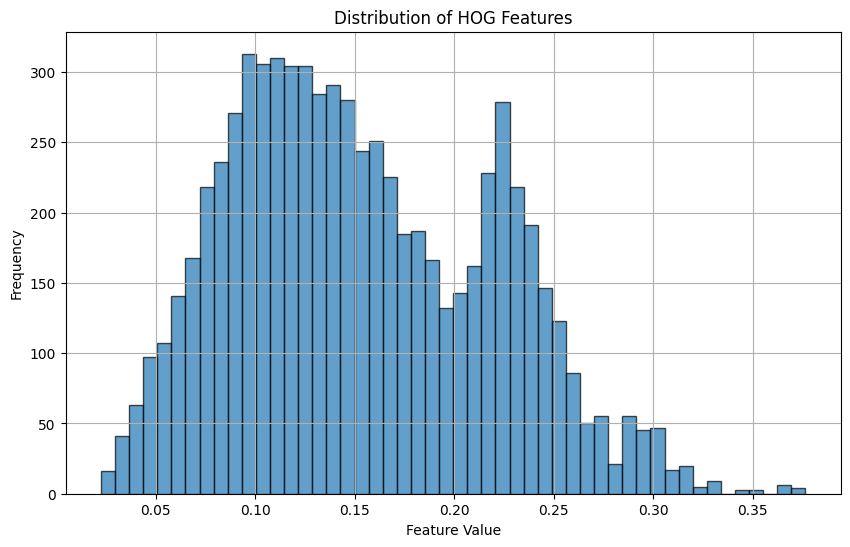

In [31]:
def plot_feature_distribution(features):
    plt.figure(figsize=(10, 6))
    plt.hist(features, bins=50, edgecolor='black', alpha=0.7)
    plt.title('Distribution of HOG Features')
    plt.xlabel('Feature Value')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

# HOG features of a test image
image_path = "C:/Users/Abhijeet/Downloads/NewSkinD/Acitinic Keratosis/ISIC_8827801.jpg"
_, processed_image = preprocess_and_predict(image_path, svm, scaler, label_encoder)
features, _ = hog(processed_image, pixels_per_cell=(16, 16), cells_per_block=(2, 2), visualize=True)
plot_feature_distribution(features)
